<a href="https://colab.research.google.com/github/Amarmurun0212/Diver/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.colors
import pickle as pkl
iris = load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2)

In [33]:
class ScratchLogisticRegression():
    def __init__(self, num_iter, lr, bias, verbose, lam):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = np.array([])
        self.loss = np.array([])
        self.val_loss = np.array([])

    def fit(self, X, y, X_val, y_val): 
        if self.bias == True:
          bias = np.ones((X.shape[0], 1))
          X = np.hstack((bias, X))
          bias = np.ones((X_val.shape[0], 1))
          X_val = np.hstack((bias, X_val))
          self.theta = np.zeros(X.shape[1])
          self.theta = self.theta.reshape(X.shape[1], 1)
          for i in range(self.num_iter):
              pred = self._logistic_hypothesis(X)
              pred_val = self._logistic_hypothesis(X_val)
              self._gradient_descent(X, y)
              loss = self._loss_func(pred, y)
              self.loss = np.append(self.loss, loss)
              loss_val = self._loss_func(pred_val, y_val)
              self.val_loss = np.append(self.val_loss, loss_val)
              if self.verbose == True:
                  print('{}回目の学習の損失は{}'.format(i,loss))

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        pred = self._logistic_hypothesis(X)
        for j in range(n):
            gradient = 0
            for i in range(m):
                gradient += (pred[i] - y[i]) * X[i, j]
            self.theta[j] = self.theta[j] - self.lr * ((gradient+self.lam*self.theta[j]) / m)
     
    def _sigmoid(self,y):
        """sigmoid関数"""
        return 1 / (1 + np.exp(-y))
        
    def _logistic_hypothesis(self, X):
        """仮定関数"""
        pred = X @ self.theta
        pred = self._sigmoid(pred)
        return pred
       
    def predict(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        return  np.where(self._logistic_hypothesis(X) >= 0.5,1,0)

    def predict_proba(self, X):
        if self.bias == True:
            a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([a, X])
        pred = self._logistic_hypothesis(X)
        return pred
        
    def _loss_func(self, pred, y):
        error = 0
        for i in range(y.shape[0]):
            error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
        loss = error / (y.shape[0])
        loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
        return loss

In [34]:
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001,bias=True,verbose=True,lam = 0.1)
slr.fit(X_train, y_train,X_test,y_test)

0回目の学習の損失は0.6931471806106941
1回目の学習の損失は0.6930660583790421
2回目の学習の損失は0.692985234469555
3回目の学習の損失は0.6929047030157034
4回目の学習の損失は0.69282445827057
5回目の学習の損失は0.6927444946044173
6回目の学習の損失は0.6926648065023006
7回目の学習の損失は0.6925853885617356
8回目の学習の損失は0.6925062354904065
9回目の学習の損失は0.6924273421039243
10回目の学習の損失は0.6923487033236304
11回目の学習の損失は0.6922703141744445
12回目の学習の損失は0.6921921697827513
13回目の学習の損失は0.6921142653743411
14回目の学習の損失は0.692036596272379
15回目の学習の損失は0.6919591578954255
16回目の学習の損失は0.6918819457554908
17回目の学習の損失は0.691804955456133
18回目の学習の損失は0.6917281826905909
19回目の学習の損失は0.6916516232399575
20回目の学習の損失は0.6915752729713913
21回目の学習の損失は0.6914991278363599
22回目の学習の損失は0.6914231838689212
23回目の学習の損失は0.6913474371840438
24回目の学習の損失は0.691271883975954
25回目の学習の損失は0.6911965205165201
26回目の学習の損失は0.6911213431536731
27回目の学習の損失は0.6910463483098513
28回目の学習の損失は0.690971532480484
29回目の学習の損失は0.6908968922325014
30回目の学習の損失は0.690822424202878
31回目の学習の損失は0.6907481250972036
32回目の学習の損失は0.6906739916882824
33回目の学習の損失は0.690600020814764

In [35]:
slr.predict(X_test)

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

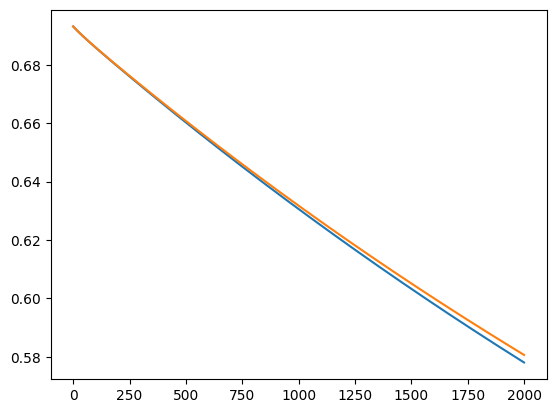

In [36]:
plt.plot(slr.loss)
plt.plot(slr.val_loss)

mesh shape:(37800, 2)


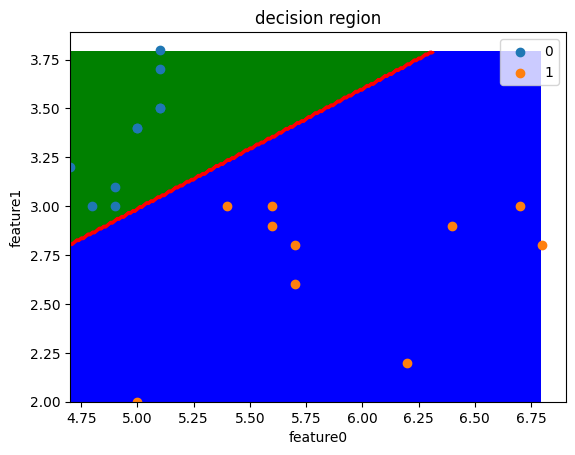

In [39]:
def decision_region(X,y,slr):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.01), 
        np.arange(np.min(X[:,1]), np.max(X[:,1]), 0.01)
    )
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print("mesh shape:{}".format(mesh.shape))
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=matplotlib.colors.ListedColormap(['green', 'blue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()

decision_region(X_test,y_test,slr)